# 1. Problem Statement:
Netflix aims to enhance its content production to increase its subscriber base and revenue in different countries.
The company wants to analyze viewer preferences and trends across regions to determine the most suitable types of shows and movies to produce.
Additionally, Netflix seeks insights into how it can effectively grow its business in diverse markets.

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/netflix_case_study.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_shows=data[data['type']=='TV Show']
netflix_movies=data[data['type']=='Movie']

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
print("shape", data.shape)
print(data.dtypes)
print(data.isnull().sum())

shape (8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
print(data.describe(include="all"))

       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough 

In [ ]:
#  Conversion of categorical attributes to 'category' (if required)
#  For example, if 'Country' and 'Rating' are categorical attributes
# data["country"] = data["country"].astype("category")
# data["rating"] = data["rating"].astype("category")
# print(data["country"])
# print(data["rating"])

#3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
#  Non-Graphical Analysis: Value counts and unique attributes
categorical_columns = ["type", "country", "rating", "duration"]
for col in categorical_columns:
  print(data[col].value_counts())

Movie      6131
TV Show    2676
Name: type, dtype: int64
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        1

In [ ]:
numerical_columns = ["release_year"]
for col in numerical_columns:
  print(data[col].value_counts())

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64


In [ ]:
unique_attributes = {}
for col in data.columns:
  unique_attributes[col] = data[col].unique()

for column, values in unique_attributes.items():
  print(column)
  print(values)

show_id
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
type
['Movie' 'TV Show']
title
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
director
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
cast
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane

#4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [ ]:
# 2. Handling null values
# a. For categorical variables with null values, update those rows as unknown_column_name.
# Example : Replace missing value with Unknown Actor for missing value in Actors column.
# b. Replace with 0 for continuous variables having null values.
categorical_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'duration']
for col in categorical_cols:
  data[col] = data[col].fillna('unknown_'+ col)
# Handling null values in continuous variables
continuous_cols = ['release_year']
data[continuous_cols] = data[continuous_cols].fillna(0)

In [ ]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 1. Un-nesting the columns
# a. Un-nest the columns those have cells with multiple comma separated values by creating multiple rows
# Identify columns with comma-separated values that need to be unnested
columns_to_unnest = ['cast', 'director', 'country']  # Add more columns as needed

# Create a list to store DataFrames with unnested columns
unnested_dfs = []

# Iterate over each column to unnest
for column in columns_to_unnest:
    # Split values by comma and create separate rows
    unnested_df = data.assign(**{column: data[column].str.split(',')}).explode(column)
    unnested_dfs.append(unnested_df)

# Concatenate all unnested DataFrames
netflix_data = pd.concat(unnested_dfs, ignore_index=True)

# Drop original rows with comma-separated values
netflix_data.dropna(subset=columns_to_unnest, inplace=True)

# Reset index
netflix_data.reset_index(drop=True, inplace=True)

In [ ]:
netflix_data.shape

(85413, 12)

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
netflix_data.shape

(85413, 12)

# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

<Axes: xlabel='type', ylabel='count'>

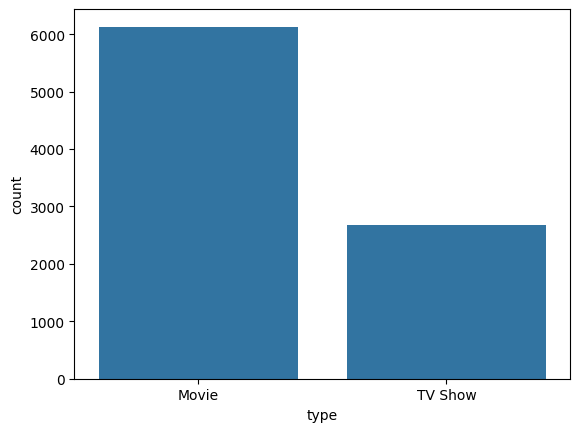

In [ ]:
sns.countplot(data=data, x="type")

<Axes: xlabel='rating', ylabel='count'>

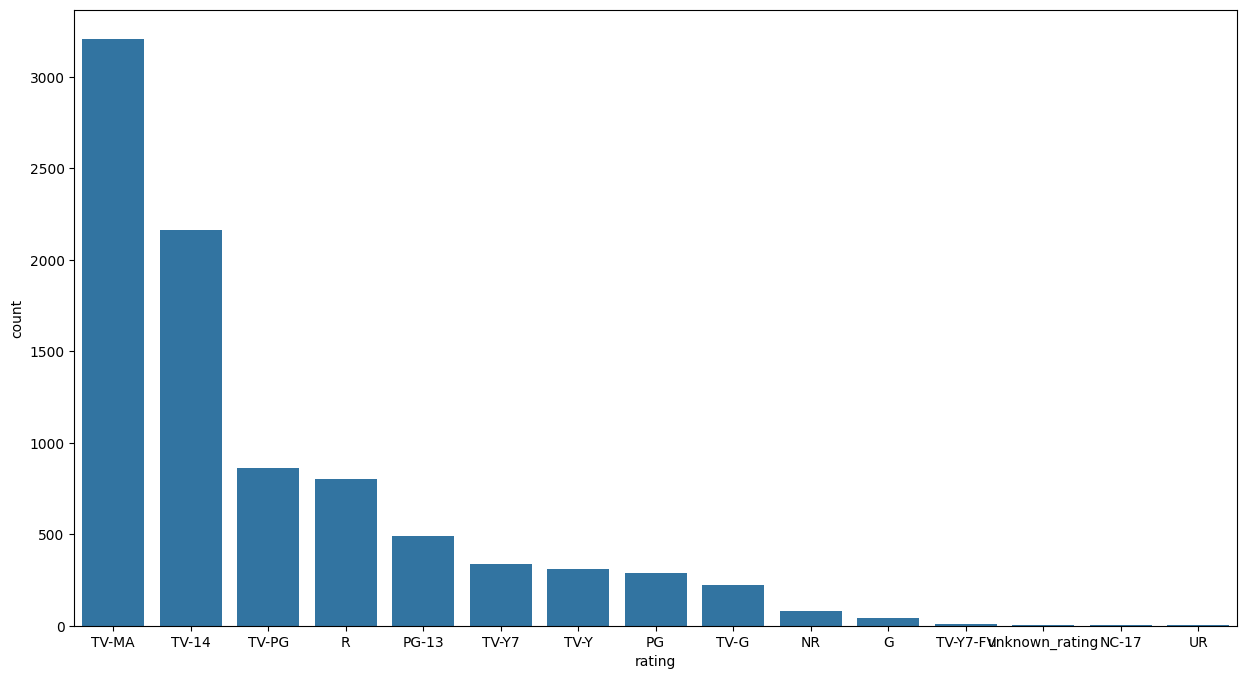

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x="rating", data=data, order=data["rating"].value_counts().index[0:15])

<Axes: xlabel='release_year', ylabel='count'>

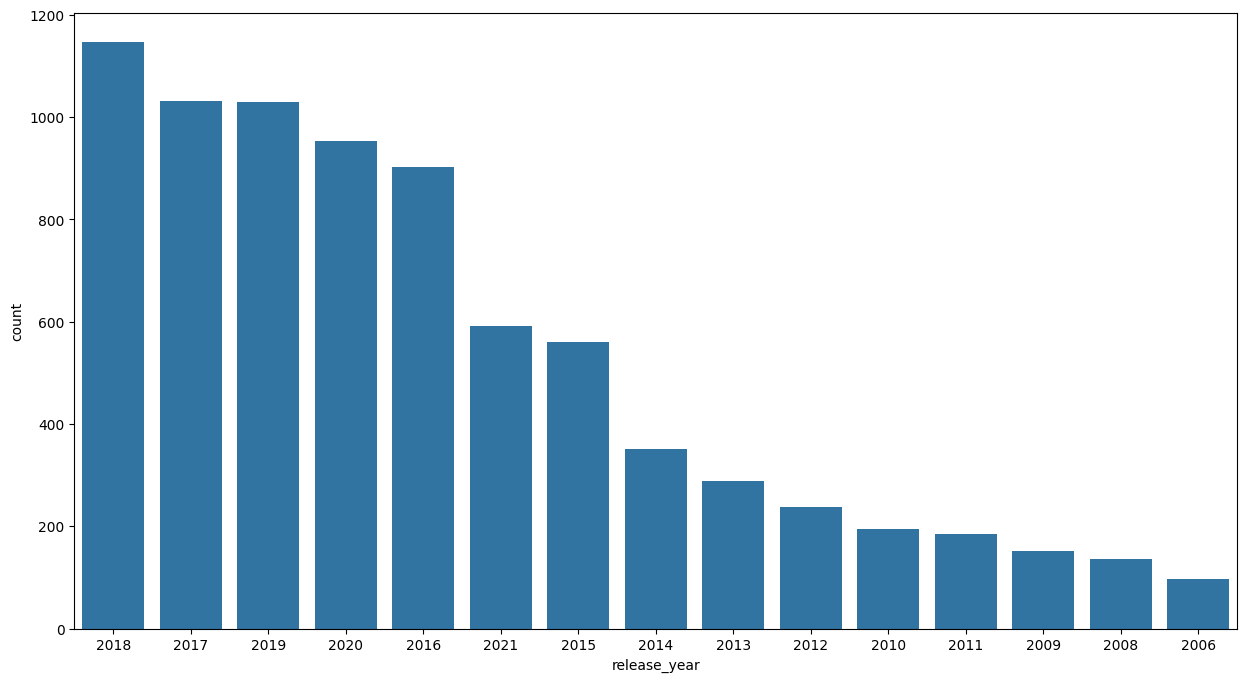

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x="release_year", data=data, order=data["release_year"].value_counts().index[0:15])

# 4.2 For categorical variable(s): Boxplot

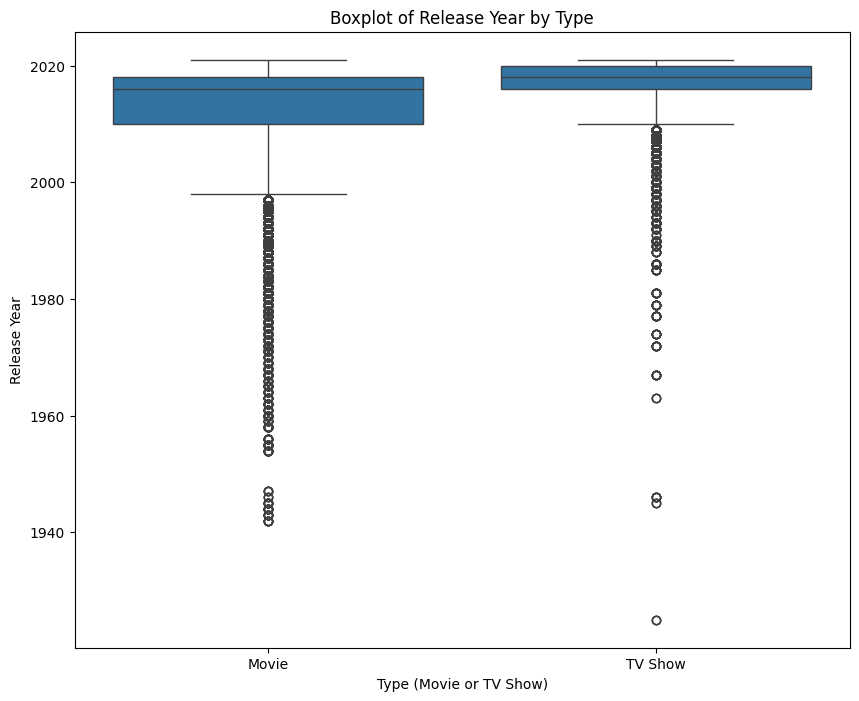

In [ ]:
categorical_column = 'type'
numerical_column = 'release_year'

# Create boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x=categorical_column, y=numerical_column, data=netflix_data)
plt.title('Boxplot of Release Year by Type')
plt.xlabel('Type (Movie or TV Show)')
plt.ylabel('Release Year')
plt.show()

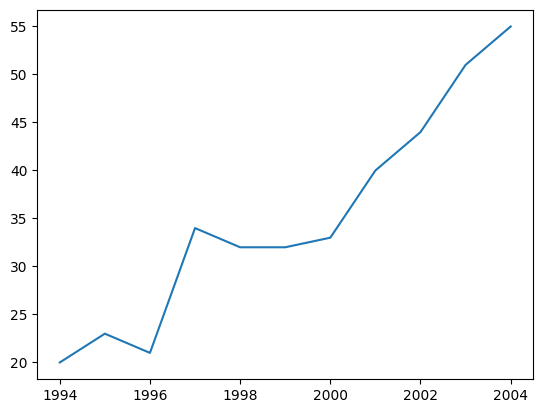

In [ ]:
# How has the number of movies released per year changed over the last 20-30 years?
# Release_year, Movies
movies = data.loc[data["type"]=="Movie"]
movies_per_year = movies.groupby('release_year').size()
current_year = pd.Timestamp.now().year
start_year = current_year-30
end_year = current_year-20
movies_per_year = movies_per_year.loc[start_year:end_year]
plt.plot(movies_per_year.index, movies_per_year.values, label="Movies")

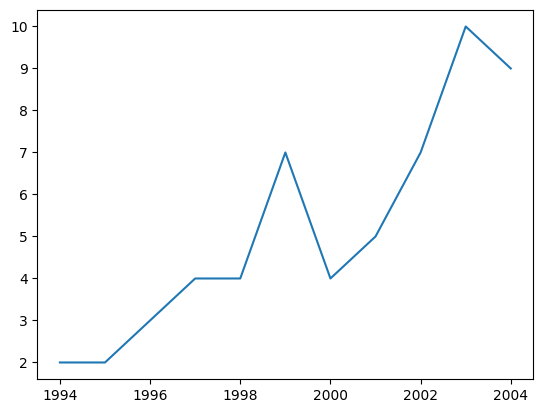

In [ ]:
tv_shows = data.loc[data["type"]=="TV Show"]
tv_shows_per_year = tv_shows.groupby('release_year').size()
current_year = pd.Timestamp.now().year
start_year = current_year-30
end_year = current_year-20
tv_shows_per_year = tv_shows_per_year.loc[start_year:end_year]
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='TV Shows')

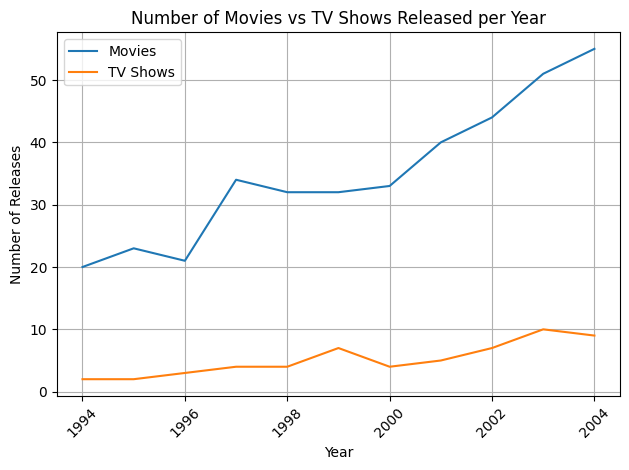

In [ ]:
# Comparison of tv shows vs. movies.
# Type
movies = data.loc[data["type"]=="Movie"]
movies_per_year = movies.groupby('release_year').size()
current_year = pd.Timestamp.now().year
start_year = current_year-30
end_year = current_year-20
movies_per_year = movies_per_year.loc[start_year:end_year]
tv_shows = data.loc[data["type"]=="TV Show"]
tv_shows_per_year = tv_shows.groupby('release_year').size()
current_year = pd.Timestamp.now().year
start_year = current_year-30
end_year = current_year-20
tv_shows_per_year = tv_shows_per_year.loc[start_year:end_year]
plt.plot(movies_per_year.index, movies_per_year.values, label="Movies")
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='TV Shows')
plt.title('Number of Movies vs TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-92-1d4b276cde0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["date_added"] = pd.to_datetime(tv_shows["date_added"])
<ipython-input-92-1d4b276cde0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["month_added"] = tv_shows["date_added"].dt.month


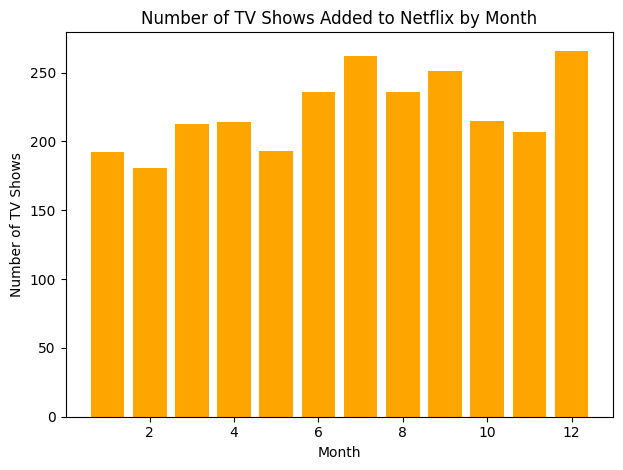

In [ ]:
# What is the best time to launch a TV show?
# Date_added, Type
tv_shows = data.loc[data["type"] == "TV Show"]
tv_shows["date_added"] = pd.to_datetime(tv_shows["date_added"])
tv_shows["month_added"] = tv_shows["date_added"].dt.month
tv_shows_by_month = tv_shows.groupby("month_added").size()
plt.title('Number of TV Shows Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)
plt.tight_layout()
plt.bar(tv_shows_by_month.index, tv_shows_by_month, color='orange')
plt.show()

<ipython-input-93-446c47a40877>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["Actors"] = movies["cast"].apply(split_cast_director)
<ipython-input-93-446c47a40877>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["Directors"] = movies["director"].apply(split_cast_director)
<ipython-input-93-446c47a40877>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

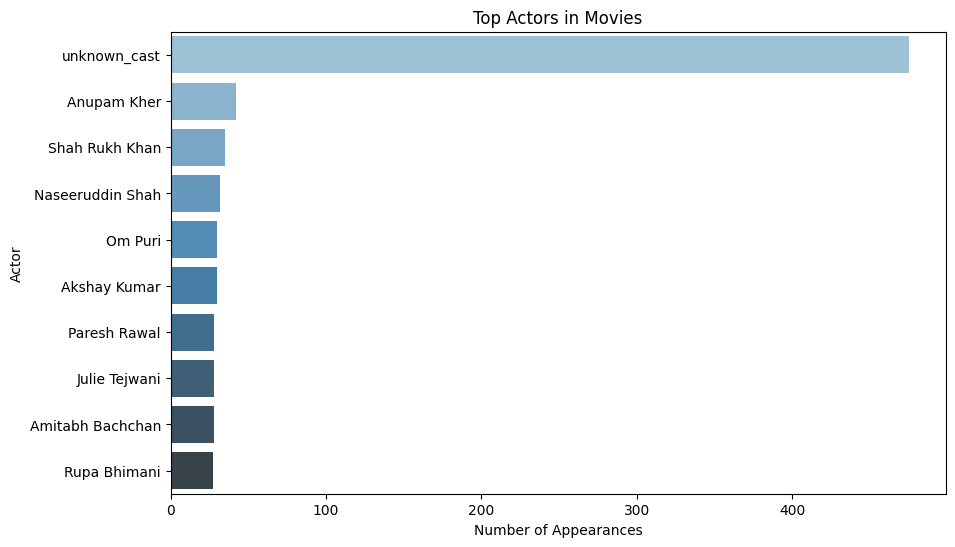

<ipython-input-93-446c47a40877>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_directors.head(10).values, y=movie_directors.head(10).index, palette="BuGn_r")


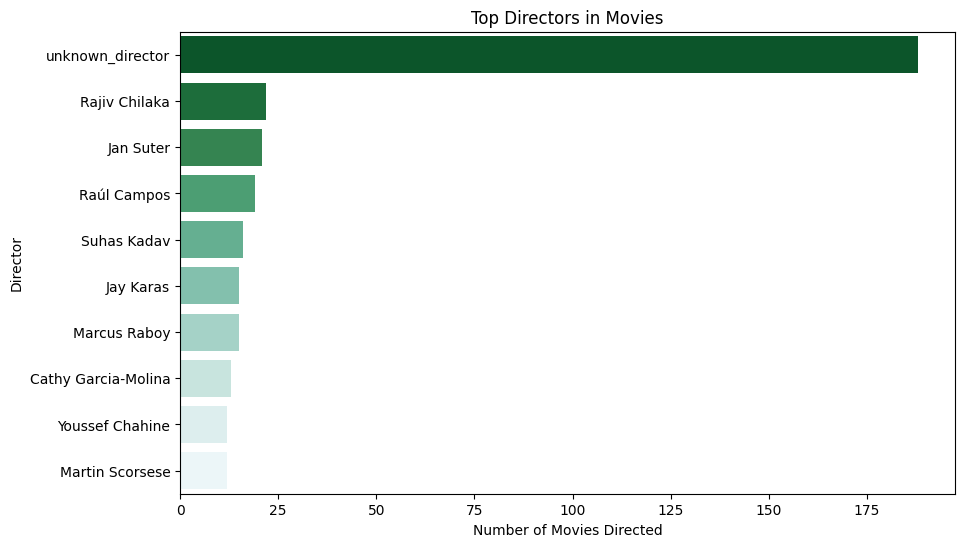

<ipython-input-93-446c47a40877>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_shows_actors.head(10).values, y=tv_shows_actors.head(10).index, palette="Oranges_r")


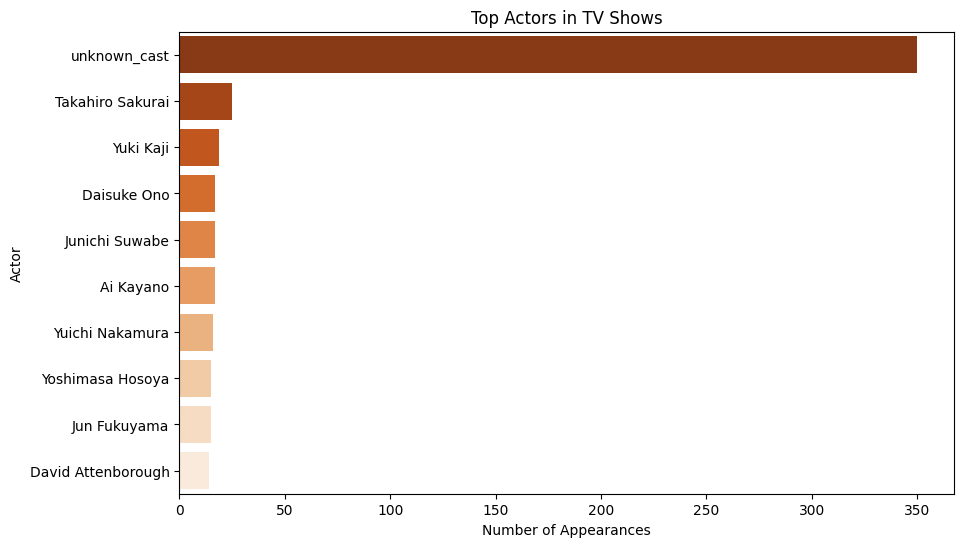

<ipython-input-93-446c47a40877>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_shows_directors.head(10).values, y=tv_shows_directors.head(10).index, palette="Reds_r")


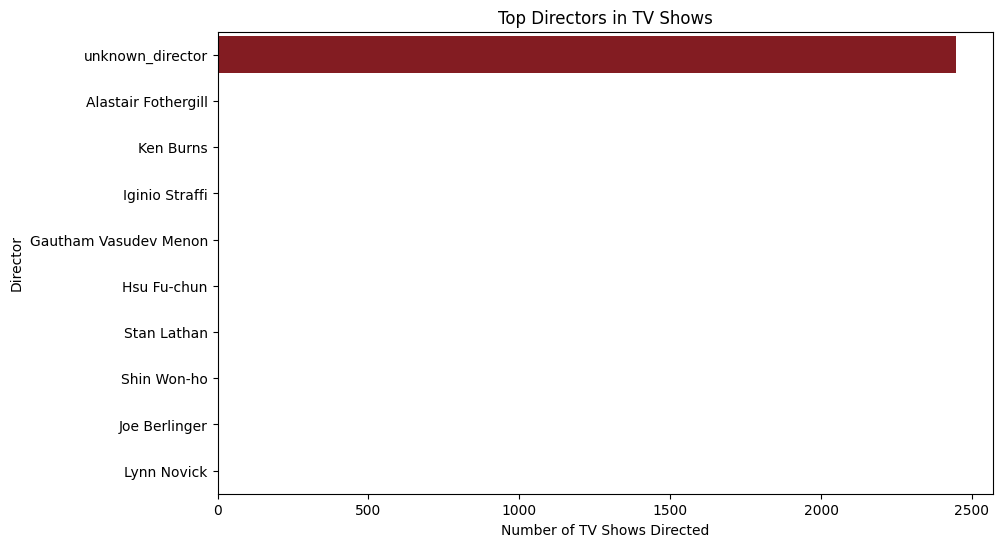

In [ ]:
# Analysis of actors/directors of different types of shows/movies.
# Director, Type, cast, Genre
movies = data.loc[data["type"] == "Movie"]
tv_shows = data.loc[data["type"] == "TV Show"]

def split_cast_director(data):
  if pd.notna(data):
    return data.split(', ')
  else:
    return

movies["Actors"] = movies["cast"].apply(split_cast_director)
movies["Directors"] = movies["director"].apply(split_cast_director)
tv_shows["Actors"] = tv_shows["cast"].apply(split_cast_director)
tv_shows["Directors"] = tv_shows["director"].apply(split_cast_director)


movie_actors = movies["Actors"].explode().value_counts()
tv_shows_actors = tv_shows["Actors"].explode().value_counts()
movie_directors = movies["Directors"].explode().value_counts()
tv_shows_directors = tv_shows["Directors"].explode().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_actors.head(10).values, y=movie_actors.head(10).index, palette="Blues_d")
plt.title('Top Actors in Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# Plot for top directors in movies
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_directors.head(10).values, y=movie_directors.head(10).index, palette="BuGn_r")
plt.title('Top Directors in Movies')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.show()

# Plot for top actors in TV shows
plt.figure(figsize=(10, 6))
sns.barplot(x=tv_shows_actors.head(10).values, y=tv_shows_actors.head(10).index, palette="Oranges_r")
plt.title('Top Actors in TV Shows')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# Plot for top directors in TV shows
plt.figure(figsize=(10, 6))
sns.barplot(x=tv_shows_directors.head(10).values, y=tv_shows_directors.head(10).index, palette="Reds_r")
plt.title('Top Directors in TV Shows')
plt.xlabel('Number of TV Shows Directed')
plt.ylabel('Director')
plt.show()

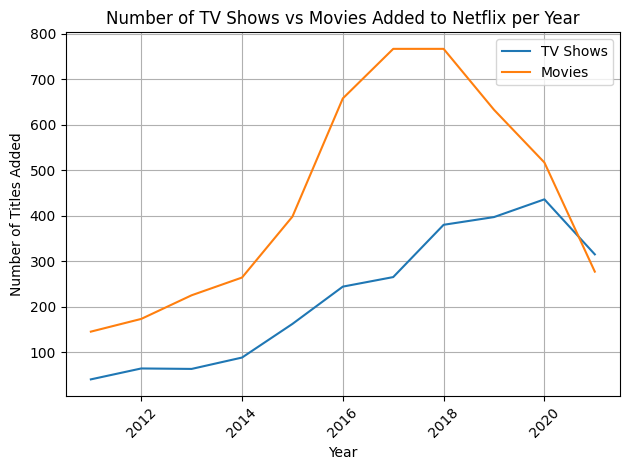

In [ ]:
# Does Netflix has more focus on TV Shows than movies in recent years
# type, release_year
movies = data.loc[(data["type"] == "Movie") & (data['release_year'] >= 2011)]
tv_shows = data.loc[(data["type"] == "TV Show") & (data['release_year'] >= 2011)]
movie_per_years = movies.groupby('release_year').size()
tv_shows_per_years = tv_shows.groupby('release_year').size()
# print(movie_per_years)
# print(tv_shows_per_years)
plt.plot(tv_shows_per_years.index, tv_shows_per_years.values, label='TV Shows')
plt.plot(movie_per_years.index, movie_per_years.values, label="Movies")
plt.title('Number of TV Shows vs Movies Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

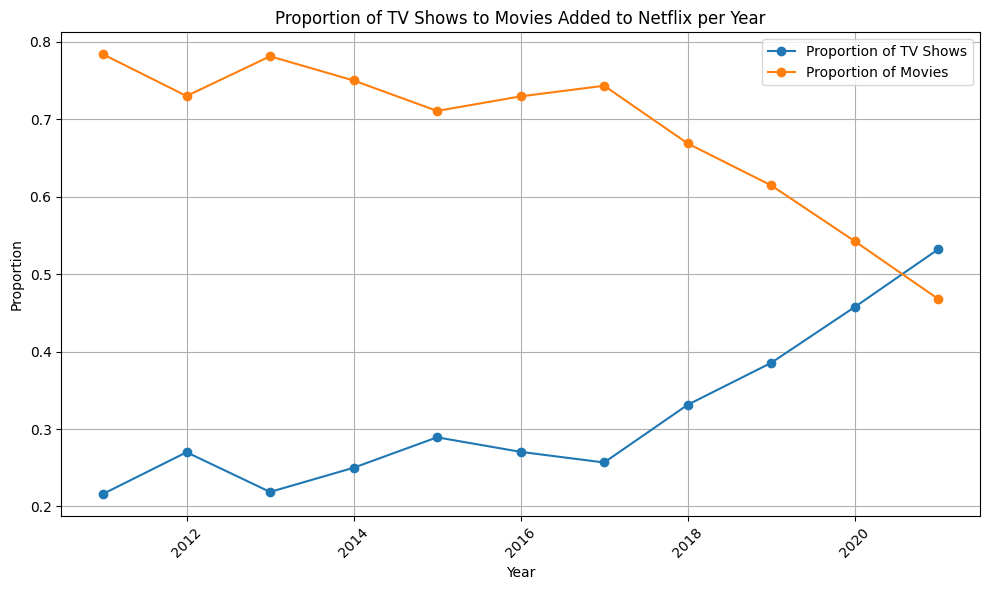

In [ ]:
# print(tv_shows_per_years)
# print(movie_per_years)
proportion_tv_shows = tv_shows_per_years / (tv_shows_per_years + movie_per_years)
proportion_movies = movie_per_years / (tv_shows_per_years + movie_per_years)
# print(proportion_tv_shows)
# print(proportion_movies)
plt.figure(figsize=(10, 6))
plt.plot(proportion_tv_shows.index, proportion_tv_shows.values, label='Proportion of TV Shows', marker='o')
plt.plot(proportion_movies.index, proportion_movies.values, label='Proportion of Movies', marker='o')
plt.title('Proportion of TV Shows to Movies Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

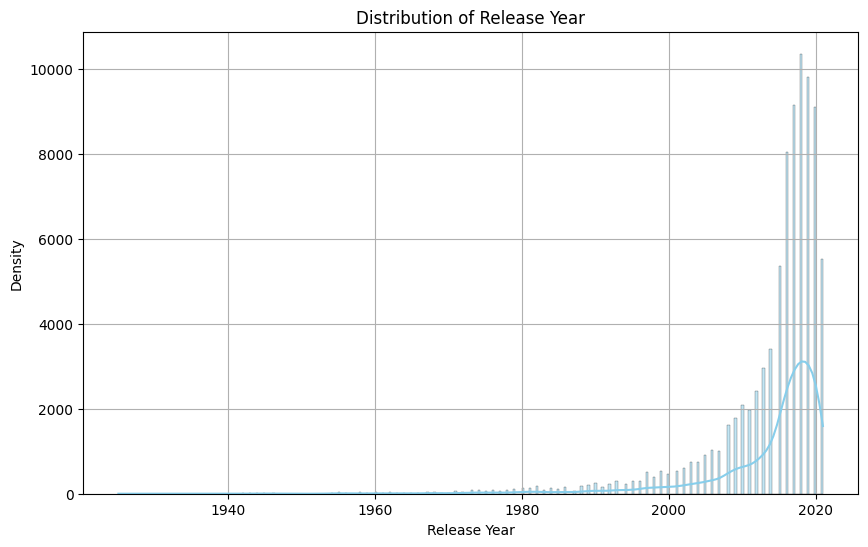

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
# 2. Comparison of tv shows vs. movies.
# a. Find the number of movies produced in each country and pick the top 10
# countries.
# Hint : We want you to apply group by each country and find the count of unique titles of movies
# b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.
# Hint : We want you to apply group by each country and find the count of unique
# titles of Tv-shows

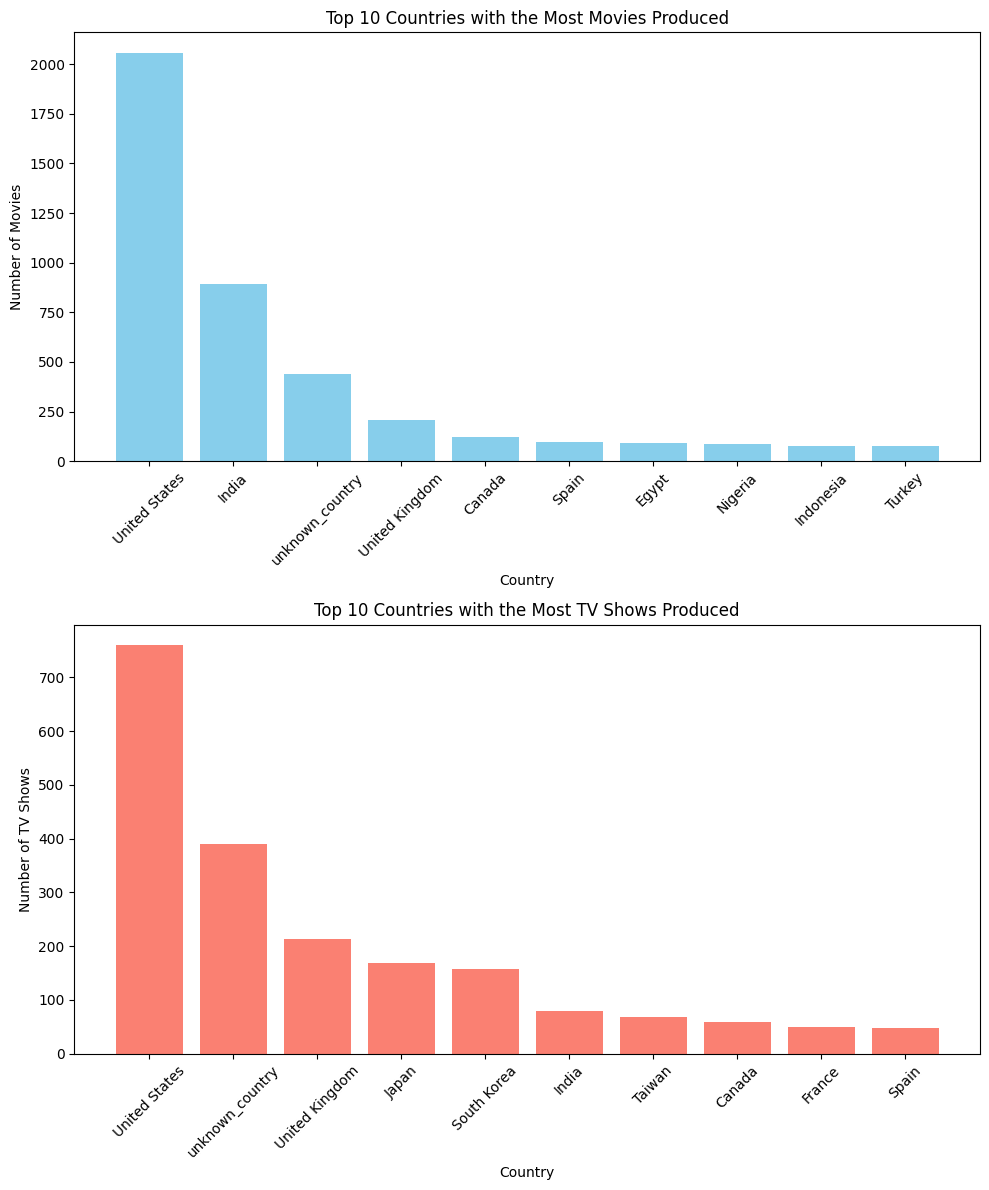

In [ ]:
movies_data = data[data['type'] == 'Movie']

# Group by country and count the number of unique movie titles
movie_counts_by_country = movies_data.groupby('country')['title'].nunique()

# Pick the top 10 countries with the highest number of movies
top_10_movie_countries = movie_counts_by_country.sort_values(ascending=False).head(10)

# print("Top 10 countries with the most movies produced:")
# print(top_10_movie_countries)

# Filter the DataFrame to contain only TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Group by country and count the number of unique TV show titles
tv_show_counts_by_country = tv_shows_data.groupby('country')['title'].nunique()

# Pick the top 10 countries with the highest number of TV shows
top_10_tv_show_countries = tv_show_counts_by_country.sort_values(ascending=False).head(10)

# print("\nTop 10 countries with the most TV shows produced:")
# print(top_10_tv_show_countries)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot top 10 countries with the most movies produced
axs[0].bar(top_10_movie_countries.index, top_10_movie_countries.values, color='skyblue')
axs[0].set_title('Top 10 Countries with the Most Movies Produced')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Number of Movies')
axs[0].tick_params(axis='x', rotation=45)

# Plot top 10 countries with the most TV shows produced
axs[1].bar(top_10_tv_show_countries.index, top_10_tv_show_countries.values, color='salmon')
axs[1].set_title('Top 10 Countries with the Most TV Shows Produced')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of TV Shows')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# 3. What is the best time to launch a TV show?
# a. Find which is the best week to release the Tv-show or the movie. Do the analysis
# separately for Tv-shows and Movies
# Hint : We expect you to create a new column and group by each week and count the total number of movies/ tv shows.
# b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies
# Hint : We expect you to create a new column and group by each month and count the total number of movies/ tv shows.

<ipython-input-100-200a436d9732>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['date_added'].dt.week


Best week to release TV shows: 27.0
Best week to release Movies: 1.0
Best month to release TV shows: 12.0
Best month to release Movies: 7.0


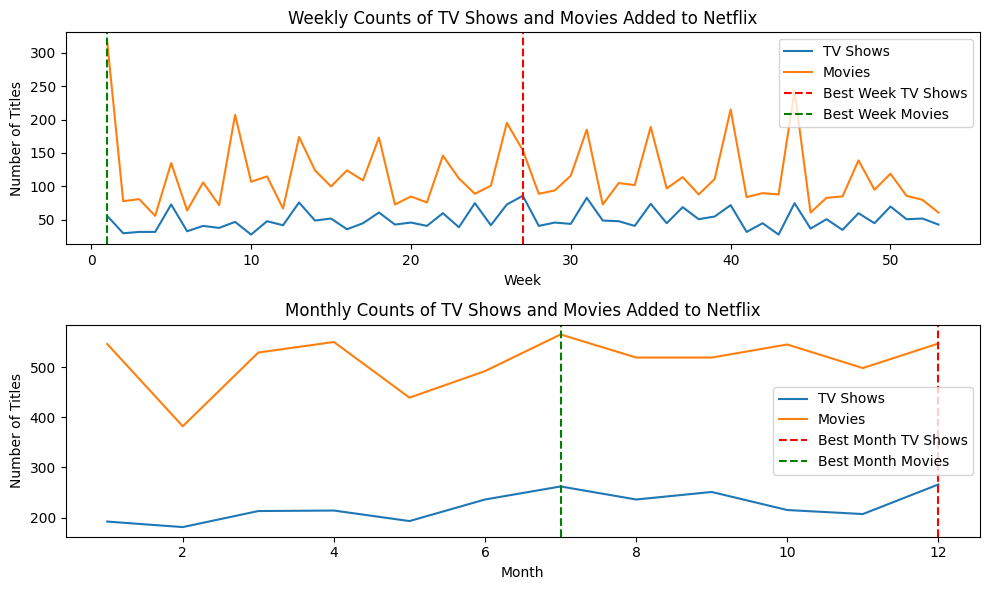

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract week and month from the 'date_added' column
data['week'] = data['date_added'].dt.week
data['month'] = data['date_added'].dt.month

# Group by week and count the number of TV shows and movies
weekly_counts_tv_shows = data[data['type'] == 'TV Show'].groupby('week').size()
weekly_counts_movies = data[data['type'] == 'Movie'].groupby('week').size()

# Group by month and count the number of TV shows and movies
monthly_counts_tv_shows = data[data['type'] == 'TV Show'].groupby('month').size()
monthly_counts_movies = data[data['type'] == 'Movie'].groupby('month').size()

# Find the best week to release TV shows and movies
best_week_tv_shows = weekly_counts_tv_shows.idxmax()
best_week_movies = weekly_counts_movies.idxmax()

# Find the best month to release TV shows and movies
best_month_tv_shows = monthly_counts_tv_shows.idxmax()
best_month_movies = monthly_counts_movies.idxmax()

print("Best week to release TV shows:", best_week_tv_shows)
print("Best week to release Movies:", best_week_movies)
print("Best month to release TV shows:", best_month_tv_shows)
print("Best month to release Movies:", best_month_movies)
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot weekly counts
plt.subplot(2, 1, 1)
weekly_counts_tv_shows.plot(label='TV Shows')
weekly_counts_movies.plot(label='Movies')
plt.title('Weekly Counts of TV Shows and Movies Added to Netflix')
plt.xlabel('Week')
plt.ylabel('Number of Titles')
plt.axvline(x=best_week_tv_shows, color='r', linestyle='--', label='Best Week TV Shows')
plt.axvline(x=best_week_movies, color='g', linestyle='--', label='Best Week Movies')
plt.legend()

# Plot monthly counts
plt.subplot(2, 1, 2)
monthly_counts_tv_shows.plot(label='TV Shows')
monthly_counts_movies.plot(label='Movies')
plt.title('Monthly Counts of TV Shows and Movies Added to Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.axvline(x=best_month_tv_shows, color='r', linestyle='--', label='Best Month TV Shows')
plt.axvline(x=best_month_movies, color='g', linestyle='--', label='Best Month Movies')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 4. Analysis of actors/directors of different types of shows/movies.
# a. Identify the top 10 directors who have appeared in most movies or TV shows.
# Hint : We want you to group by each actor and find the count of unique titles of Tv-shows/movies
# b. Identify the top 10 directors who have appeared in most movies or TV shows.
# Hint : We want you to group by each director and find the count of unique titles
# of Tv-shows/movies

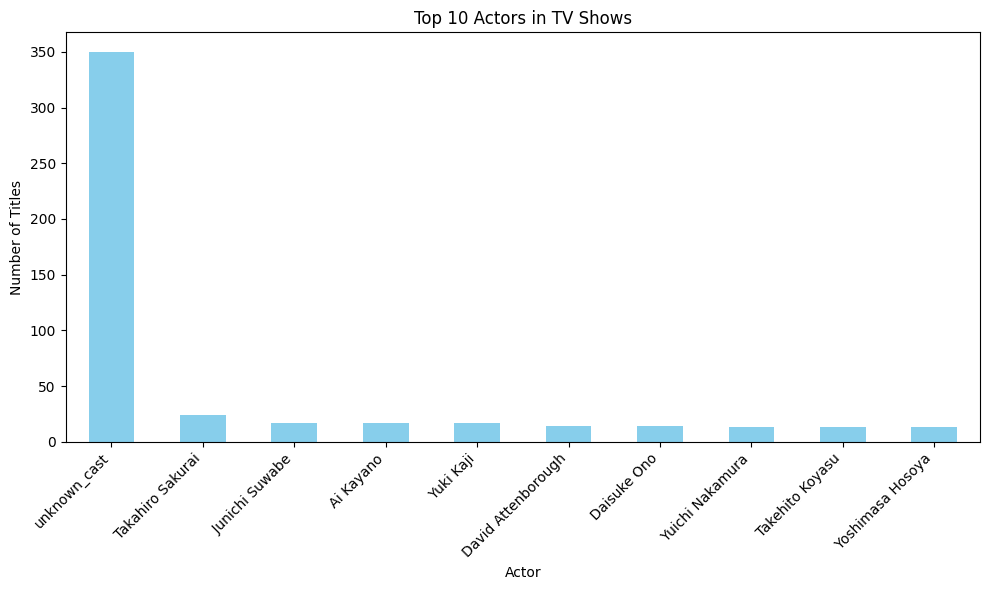

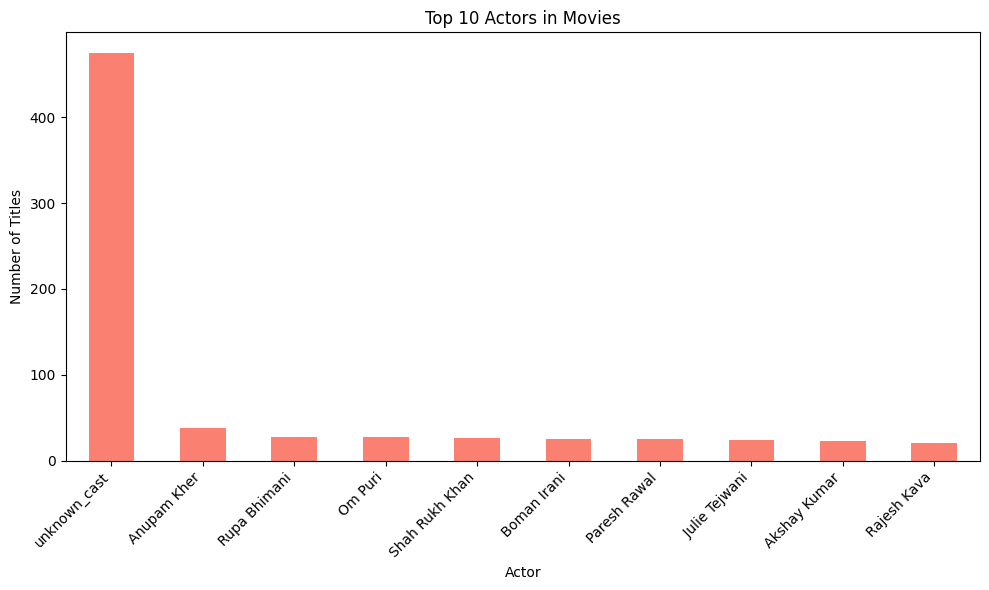

In [ ]:
# Filter data for TV shows and movies separately
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies = netflix_data[netflix_data['type'] == 'Movie']

# Create DataFrames for actors in TV shows and movies and count the number of unique titles they've appeared in
tv_show_actor_counts = tv_shows.groupby('cast')['title'].nunique()
movie_actor_counts = movies.groupby('cast')['title'].nunique()

# Select the top 10 actors based on the counts for TV shows and movies separately
top_10_tv_show_actors = tv_show_actor_counts.sort_values(ascending=False).head(10)
top_10_movie_actors = movie_actor_counts.sort_values(ascending=False).head(10)

# print("Top 10 actors who have appeared in the most TV shows:")
# print(top_10_tv_show_actors)

# print("\nTop 10 actors who have appeared in the most movies:")
# print(top_10_movie_actors)
# Plotting the top 10 actors who have appeared in the most TV shows
plt.figure(figsize=(10, 6))
top_10_tv_show_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actors in TV Shows')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 actors who have appeared in the most movies
plt.figure(figsize=(10, 6))
top_10_movie_actors.plot(kind='bar', color='salmon')
plt.title('Top 10 Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

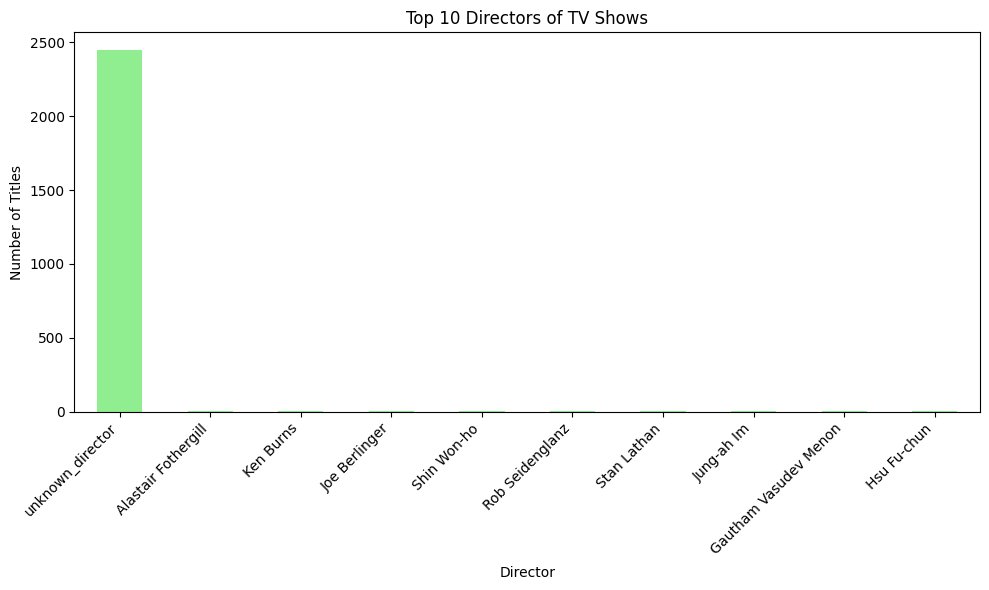

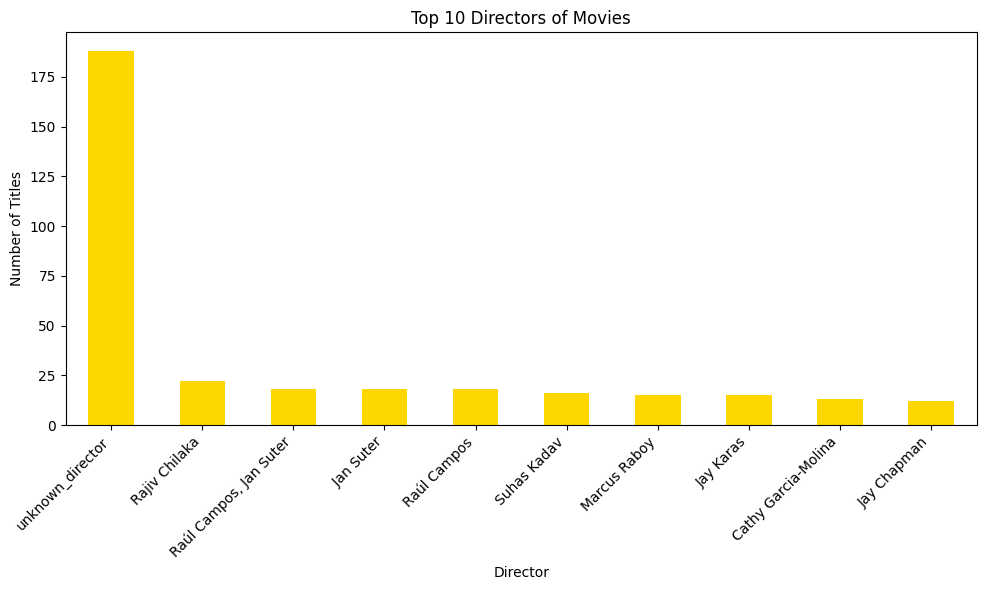

In [ ]:
# Create DataFrames for directors in TV shows and movies and count the number of unique titles they've directed
tv_show_director_counts = tv_shows.groupby('director')['title'].nunique()
movie_director_counts = movies.groupby('director')['title'].nunique()

# Select the top 10 directors based on the counts for TV shows and movies separately
top_10_tv_show_directors = tv_show_director_counts.sort_values(ascending=False).head(10)
top_10_movie_directors = movie_director_counts.sort_values(ascending=False).head(10)

# print("Top 10 directors who have directed the most TV shows:")
# print(top_10_tv_show_directors)

# print("\nTop 10 directors who have directed the most movies:")
# print(top_10_movie_directors)
# Plotting the top 10 directors who have directed the most TV shows
plt.figure(figsize=(10, 6))
top_10_tv_show_directors.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Directors of TV Shows')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 directors who have directed the most movies
plt.figure(figsize=(10, 6))
top_10_movie_directors.plot(kind='bar', color='gold')
plt.title('Top 10 Directors of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

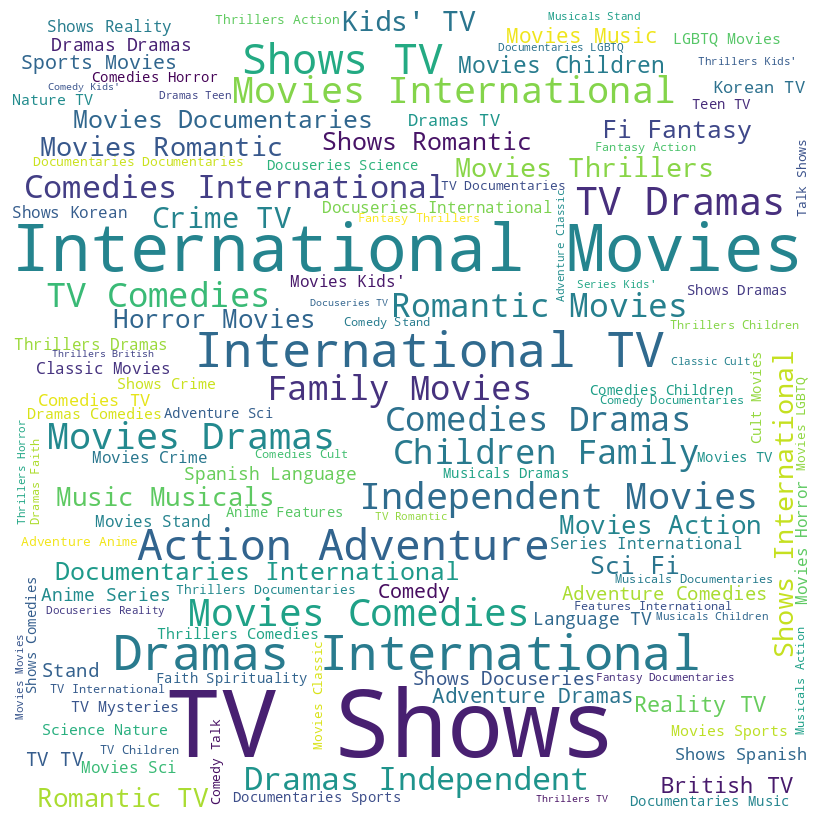

In [ ]:
# 5. Which genre movies are more popular or produced more
# Hint : We want you to apply the word cloud on the genre columns to know which kind
# of genre is produced
from wordcloud import WordCloud
genres = data["listed_in"]
genre_text = " ".join(genres.dropna())
word_cloud = WordCloud(width=800, height=800, background_color="white",
                       stopwords=None, min_font_size = 10).generate(genre_text)
# Display the generated word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
genre_counts = data['listed_in'].value_counts()
genre_counts

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

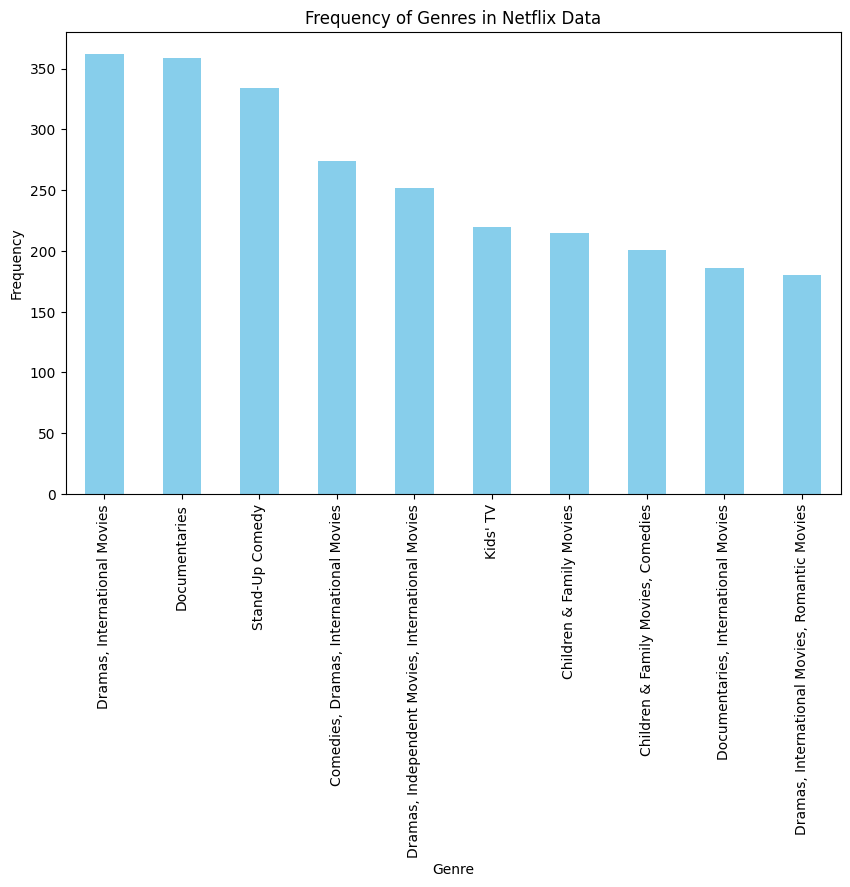

In [ ]:
import matplotlib.pyplot as plt

genre_counts[0:10].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frequency of Genres in Netflix Data')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)
# Hint : We want you to get the difference between the columns having date added information and release year information and
# get the mode of difference. This will give an insight into what will be the better time to add in Netflix
# Convert release_date and date_added columns to datetime objects
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')
data['date_added'] = pd.to_datetime(data['date_added'])

# Calculate the difference in days between date_added and release_date
data['days_to_netflix'] = (data['date_added'] - data['release_year']).dt.days
mode_days_to_netflix = data['days_to_netflix'].mode()[0]
mode_days_to_netflix

334.0

#6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the distribution of the variables and relationship between them

6.2 Comments for each univariate and bivariate plot

In [ ]:
# 1. Release year has more no of releases from 2000 to 2020
# 2. Movies produced in united states have more popularity and have more views. ALso observed that most watched genre is of
# Dramas, International movies and Documentaries
# 3. The more no of TV shows are produced with Mature Audience Rated
# 4. More no of movies and shows are being release in the month of December and july respectively

#7. Business Insights - Should include patterns observed in the data along with what you can infer from it

In [ ]:
# 1. Movies produced in united states have more popularity and have more views. ALso observed that most watched genre is of
# Dramas, International movies and Documentaries
# 2. More no of movies and shows are being release in the month of December and july respectively
# 3. The more no of TV shows are produced with Mature Audience Rated
# 4. A movie takes 334 days to be added into netflix after it's release date
# 5. More no of TV shows and movies are produced in United states

#8. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

In [ ]:
# 1. Focus on Producing Popular Genres: Invest more in producing dramas, international movies, and documentaries as
# they are the most-watched genres. This can attract a larger audience and increase viewership.

# 2. Strategic Release Timing: Plan to release more movies in July and more TV shows in December
# to capitalize on the observed trend of increased viewership during these months. This can help maximize exposure and viewership for new content.

# 3. Target Mature Audience: Allocate resources towards producing TV shows targeted at mature audiences
# since they have been observed to have higher production numbers. This can cater to a specific demographic and potentially increase viewership among mature audiences.

# 4. Optimize Content Addition Timeline: Streamline the process of adding movies to the Netflix library after their release date
# to reduce the average time lag of 334 days. This can help ensure that new content is available to viewers sooner,
# enhancing user satisfaction and engagement.

# 5. Diversify Content Sources: While the majority of content is produced in the United States,
# consider expanding partnerships and acquisitions globally to diversify the content library.
# This can offer viewers a wider range of choices and attract audiences from different regions.

# By implementing these recommendations, Netflix can capitalize on existing trends, optimize its content strategy, and
# potentially increase viewership and subscriber engagement.
